# Tarea Semanal 9

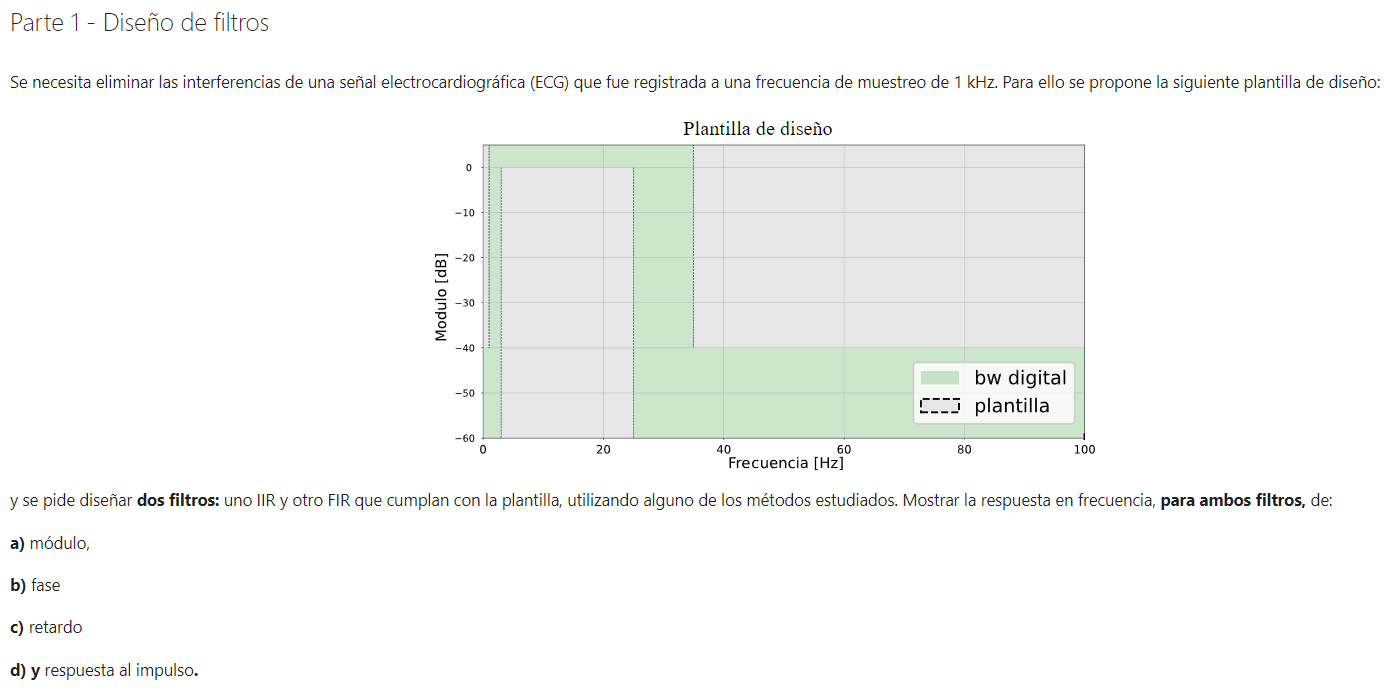

## Filtro IIR Butterworth Bandpass

C:\Users\joaqu\AppData\Local\Temp/ipykernel_10764/3885223631.py:38: RuntimeWarning: divide by zero encountered in log10
  ax[0,0].plot(f,20*np.log10(abs(1.79*H)))
C:\Users\joaqu\anaconda3\lib\site-packages\scipy\signal\filter_design.py:689: UserWarning: The group delay is singular at frequencies [0.000, 0.006, 0.012, 0.018, 0.025, 0.031, 0.037, 0.043, 0.049, 0.055, 0.061, 0.067, 0.074, 0.080, 0.086, 0.092, 0.098, 0.104, 0.110, 0.117, 0.123, 0.129, 0.135, 0.141, 0.147, 0.153, 0.160, 0.166, 0.172, 0.178, 0.184, 0.190, 0.196, 0.202, 0.209, 0.215, 0.221, 0.227, 0.233, 0.239, 0.245, 0.252, 0.258, 0.264, 0.270, 0.276, 0.282, 0.288, 0.295, 0.301, 0.307, 0.313, 0.319, 0.325, 0.331, 0.337, 0.344, 0.350, 0.356, 0.362, 0.368, 0.374, 0.380, 0.387, 0.393, 0.399, 0.405, 0.411, 0.417, 0.423, 0.430, 0.436, 0.442, 0.448, 0.454, 0.460, 0.466, 0.472, 0.479, 0.485, 0.491, 0.497, 0.503, 0.509, 0.515, 0.522, 0.528, 0.534, 0.540, 0.546, 0.552, 0.558, 0.565, 0.571, 0.577, 0.583, 0.589, 0.595, 0.601, 0.607, 0.

Text(0, 0.5, '$h[n]$')

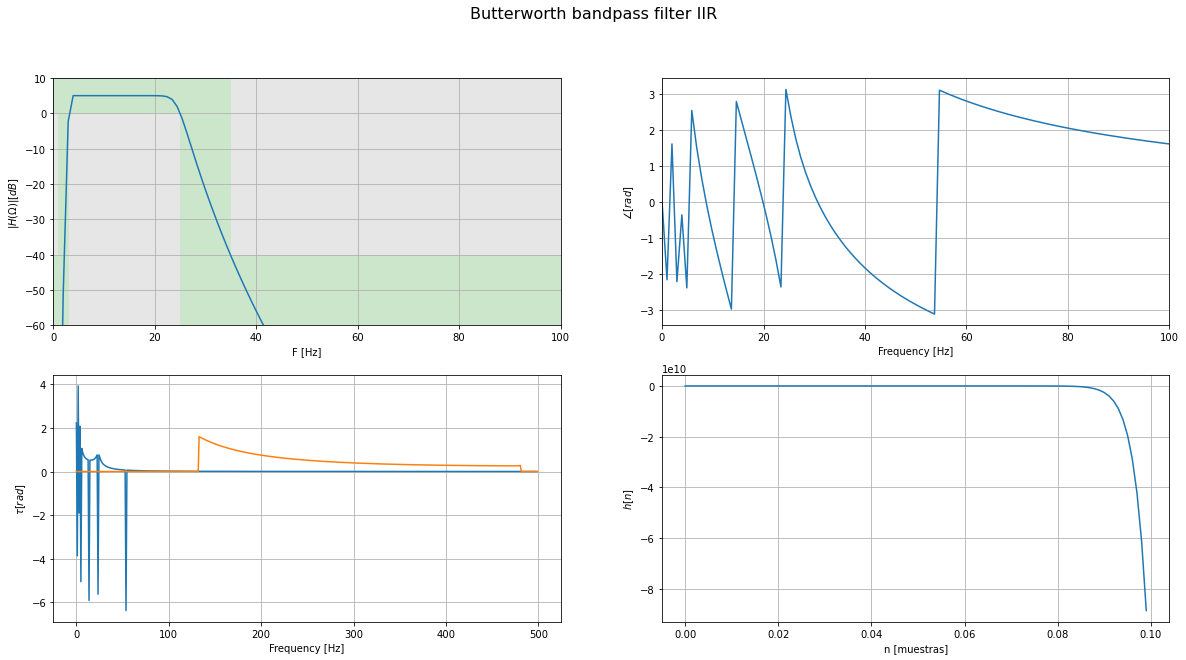

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 29 21:13:58 2022

@author: Joaquin
"""

import scipy.signal as sig
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

fs = 1e3

f_paso1 = 3
f_paso2 = 25
f_stop1 = 1
f_stop2 = 35

alpha_max = 5
alpha_min = 45


orden, wn = sig.buttord([f_paso1,f_paso2], [f_stop1,f_stop2], alpha_max, alpha_min,fs=fs)


sos = sig.butter(orden, wn,btype = 'bandpass',output='sos',fs=fs)



f,H = sig.sosfreqz(sos,fs=fs)


plt.close()
fig,ax = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('Butterworth bandpass filter IIR', fontsize=16)

ax[0,0].plot(f,20*np.log10(abs(1.79*H)))
ax[0,0].set_xlim([0,100])
ax[0,0].set_ylim([-60,10])
ax[0,0].set_xlabel('F [Hz]')
ax[0,0].set_ylabel(r'$|H(\Omega)| [dB]$')

ax[0,0].fill([f_stop1, 0 ,  0,   f_stop1], [-alpha_min+5, -alpha_min+5, 0, 0], '0.9', lw=0) # stop
ax[0,0].fill([f_paso2,  f_paso1,  f_paso1,   f_paso2], [-60, -60, -alpha_max+5, -alpha_max+5], '0.9', lw=0) # stop
ax[0,0].fill([f_stop2,  100,  100,   f_stop2], [-alpha_min+5, -alpha_min+5, -alpha_max+15, -alpha_max+15], '0.9', lw=0) # stop
ax[0,0].grid(which='both', axis='both')
ax[0,0].set_facecolor([204/255,230/255,204/255]) 

ax[0,1].plot(f,np.angle(H))
ax[0,1].set_xlim([0,100])
ax[0,1].grid()
ax[0,1].set_xlabel('Frequency [Hz]')
ax[0,1].set_ylabel(r"$\angle [rad]$")


b,a=sig.sos2tf(sos)


f_tau,tau1 = sig.group_delay((b,a),fs=fs)
tau =- np.diff(np.angle(H))/np.diff(f)
               
ax[1,0].plot(f[0:len(f)-1],tau,f_tau,tau1)


ax[1,0].set_xlabel('Frequency [Hz]')
ax[1,0].set_ylabel(r"$\tau [rad]$")
ax[1,0].grid()

t,h = sig.dimpulse((b,a,1/fs))

ax[1,1].plot(t, np.squeeze(h))
ax[1,1].grid()
ax[1,1].set_xlabel('n [muestras]')
ax[1,1].set_ylabel(r'$h[n]$')




## Filtrado Señal ECG con IIR

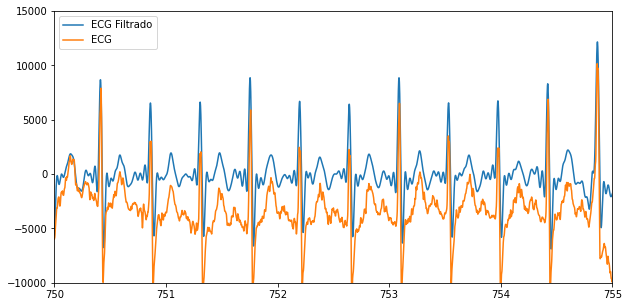

In [2]:
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
N0 = len(ecg_one_lead)

signal  = sig.sosfiltfilt(sos, ecg_one_lead)

fig,ax = plt.subplots(1,1,figsize=(10,5))

t = np.linspace(0,N0/fs,N0)
ax.plot(t,signal,label='ECG Filtrado')
ax.plot(t,ecg_one_lead,label='ECG')
ax.legend()
ax.set_xlim([750,755])
ax.set_ylim([-10e3,15e3])


plt.show()

## Filtro FIR Kaiser 3500 taps Bandpass

(1250.0, 2250.0)

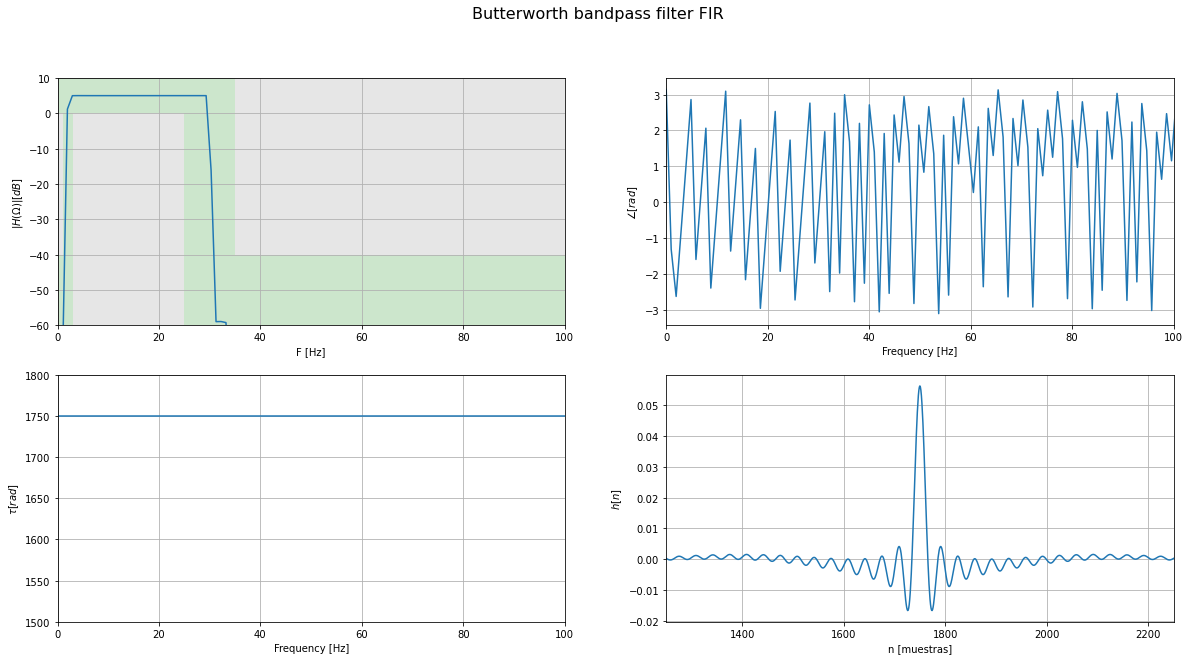

In [3]:
from numpy import genfromtxt

data = genfromtxt('taps.CSV', delimiter=',')
b = data
f,H = sig.freqz(b,fs=fs)

plt.close('all')
fig,ax = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('Butterworth bandpass filter FIR', fontsize=16)

ax[0,0].plot(f,20*np.log10(abs(1.79*H)))
ax[0,0].set_xlim([0,100])
ax[0,0].set_ylim([-60,10])
ax[0,0].set_xlabel('F [Hz]')
ax[0,0].set_ylabel(r'$|H(\Omega)| [dB]$')

ax[0,0].fill([f_stop1, 0 ,  0,   f_stop1], [-alpha_min+5, -alpha_min+5, 0, 0], '0.9', lw=0) # stop
ax[0,0].fill([f_paso2,  f_paso1,  f_paso1,   f_paso2], [-60, -60, -alpha_max+5, -alpha_max+5], '0.9', lw=0) # stop
ax[0,0].fill([f_stop2,  100,  100,   f_stop2], [-alpha_min+5, -alpha_min+5, -alpha_max+15, -alpha_max+15], '0.9', lw=0) # stop
ax[0,0].grid(which='both', axis='both')
ax[0,0].set_facecolor([204/255,230/255,204/255]) 

ax[0,1].plot(f,np.angle(H))
ax[0,1].set_xlim([0,100])
ax[0,1].set_xlabel('Frequency [Hz]')
ax[0,1].set_ylabel(r"$\angle [rad]$")
ax[0,1].grid(which='both', axis='both')



#tau = np.diff(np.angle(H)/(f[1]-f[0]))
f_tau,tau = sig.group_delay((b,1),f,fs=fs)
ax[1,0].plot(f_tau,tau)
ax[1,0].set_xlim([0,100])
ax[1,0].set_xlabel('Frequency [Hz]')
ax[1,0].set_ylabel(r"$\tau [rad]$")
ax[1,0].set_ylim([1500,1800])
ax[1,0].grid(which='both', axis='both')

ax[1,1].plot(range(0,len(b)),b)
ax[1,1].grid(which='both', axis='both')
ax[1,1].set_xlabel('n [muestras]')
ax[1,1].set_ylabel(r'$h[n]$')
ax[1,1].set_xlim([1250,2250])


## Filtrado Señal ECG con FIR

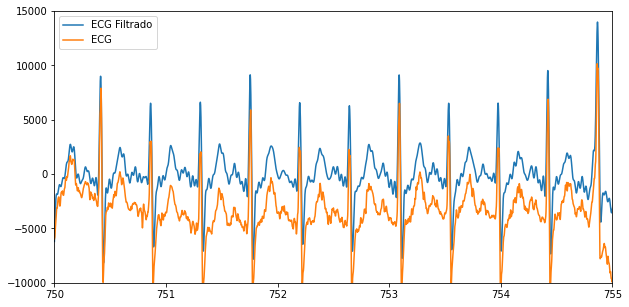

In [4]:
signal  = sig.filtfilt(b, 1, ecg_one_lead)

fig,ax = plt.subplots(1,1,figsize=(10,5))

t = np.linspace(0,N0/fs,N0)
ax.plot(t,signal,label='ECG Filtrado')
ax.plot(t,ecg_one_lead,label='ECG')
ax.legend()
ax.set_xlim([750,755])
ax.set_ylim([-10e3,15e3])

plt.show()
